In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io

from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr

from src.utils import load_images, down_sample, interpolate_rgb

## Load images

In [2]:
# Load ground truths.
ims_gt = load_images()
ims_gt.shape

(15, 1024, 1024, 3)

## Downsample to line scan and interpolate

In [3]:
ims_ds = []
ims_interp = []
mse_list = []
psnr_list = []

for im in ims_gt:
    # Downsample.
    im_ds, mask = down_sample(im, stride=12, is_torch=False)
    ims_ds.append(im_ds)

    mask2d = (1 - mask[:,:,0]).astype(np.bool)
    # Interpolate.
    im_interp = interpolate_rgb(im_ds, mask2d)
    ims_interp.append(im_interp)
    
    # Calculate MSE and PSNR
    mse_list.append(mse(im_interp, im))
    psnr_list.append(psnr(im_interp, im))
    
ims_ds = np.array(ims_ds)
ims_interp = np.array(ims_interp)

In [4]:
print('Mean MSE:', np.mean(mse_list))
print('Mean PSNR:', np.mean(psnr_list))

Mean MSE: 6.27121565813666e-05
Mean PSNR: 42.2732898371419


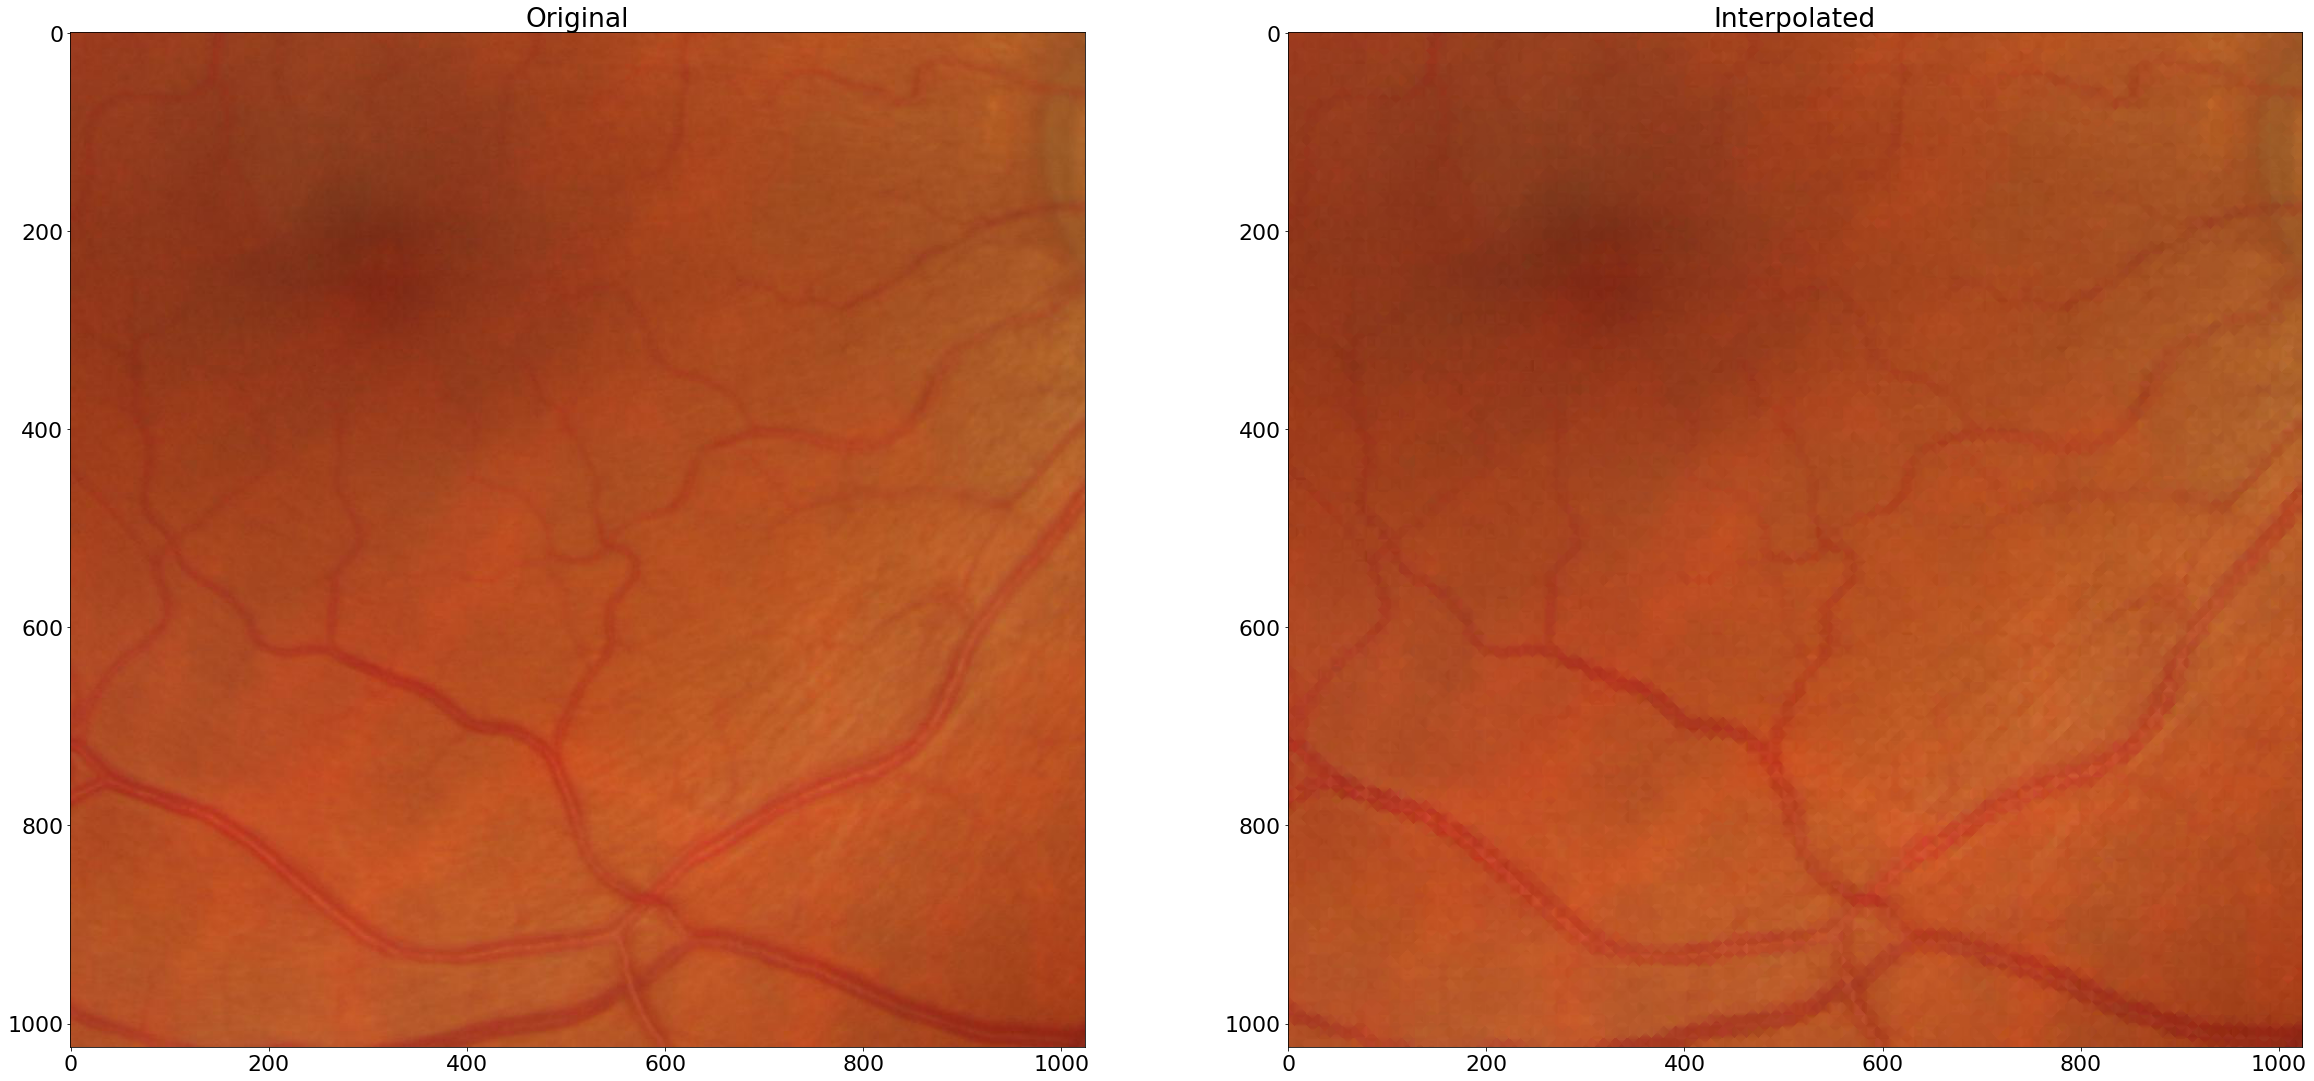

In [5]:
idx = 14

plt.rcParams.update({'font.size': 22})
fig, axes = plt.subplots(1, 2, figsize=(40, 20))

axes[0].imshow(ims_gt[idx])
axes[0].set_title('Original')
axes[1].imshow(ims_interp[idx])
axes[1].set_title('Interpolated')
plt.show()